In [2]:
#importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data
stock = pd.read_csv(r"C:\Users\isbil\Documents\Project\Python\Risk Analysis\stock_data.csv", parse_dates= True, index_col = ['Date']).dropna()
benchmark = pd.read_csv(r"C:\Users\isbil\Documents\Project\Python\Risk Analysis\benchmark_data.csv", parse_dates= True, index_col=["Date"]).dropna()

In [3]:
#let have a look at the two dataset

print("Stock\n")
print(stock.info())
print(stock.head())

print("Benchmark\n")
print(benchmark.info())
print(benchmark.head())

Stock

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002
Benchmark

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None
            S&P 500
Date               
2016-01-04  2012.66
2016-01-05  2016.71
2016-01-06  1990.26
2016-01-07  1943.09
2016-01-08 

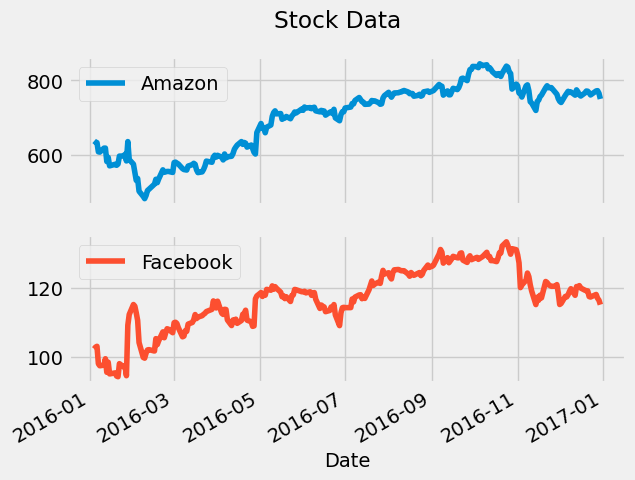

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


In [4]:
# let visually look at the data
stock.plot(subplots = True, title = 'Stock Data')
plt.show()

#summarize the data
stock.describe()

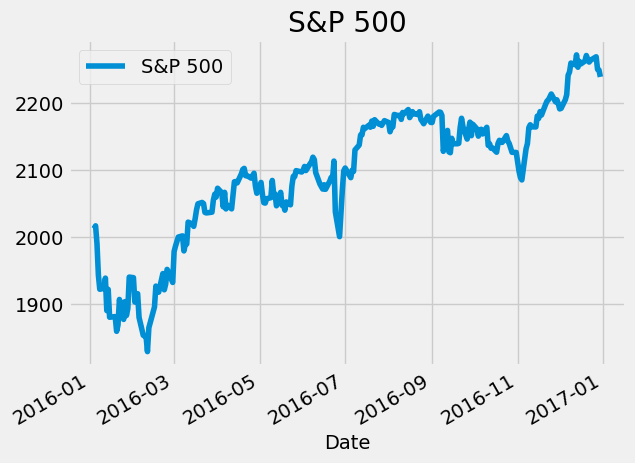

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [5]:
# let visually look at the benchmark data
benchmark.plot(title = "S&P 500")
plt.show()

#summarize the data
benchmark.describe()

              Amazon  Facebook
Date                          
2016-01-04       NaN       NaN
2016-01-05 -0.005024  0.004989
2016-01-06 -0.001799  0.002336
2016-01-07 -0.039058 -0.049043
2016-01-08 -0.001464 -0.006025
           Amazon    Facebook
count  251.000000  251.000000
mean     0.000818    0.000626
std      0.018383    0.017840
min     -0.076100   -0.058105
25%     -0.007211   -0.007220
50%      0.000857    0.000879
75%      0.009224    0.008108
max      0.095664    0.155214


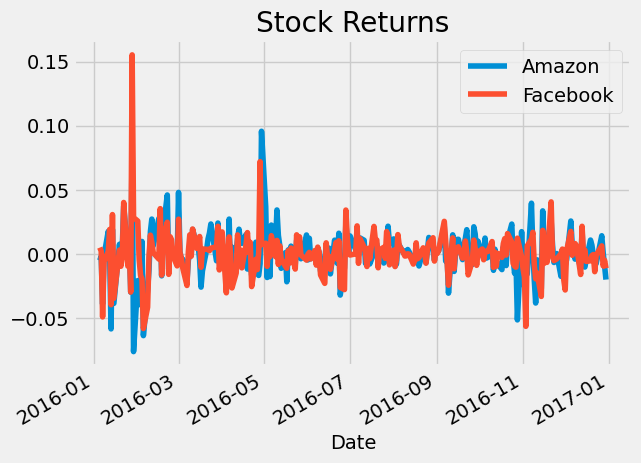

In [6]:
# We going to calculate for the dialy percentage change in the stocks
stock_returns = stock.pct_change()

#let view the first 5 rows
print(stock_returns.head())

#let summarize the data
print(stock_returns.describe())

#let visually view the returns 
stock_returns.plot(title = "Stock Returns")
plt.show()

Date
2016-01-04         NaN
2016-01-05    0.002012
2016-01-06   -0.013115
2016-01-07   -0.023700
2016-01-08   -0.010838
Name: S&P 500, dtype: float64
count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64


<Axes: title={'center': 'S&P 500'}, xlabel='Date'>

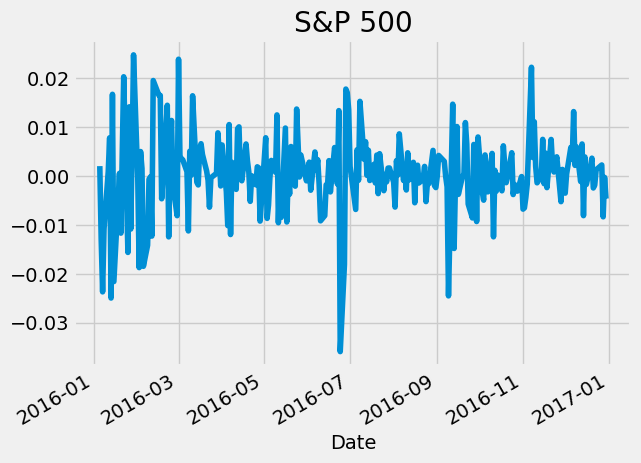

In [7]:
#let calculate the percentage change in the S&P 500
benchmark_returns = benchmark["S&P 500"].pct_change()

#let look at the first 5 rows 
print(benchmark_returns.head())

#let summarize the data
print(benchmark_returns.describe())

#let view the data visually 
benchmark_returns.plot(title = "S&P 500")

              Amazon  Facebook
Date                          
2016-01-04       NaN       NaN
2016-01-05 -0.007036  0.002977
2016-01-06  0.011317  0.015452
2016-01-07 -0.015358 -0.025343
2016-01-08  0.009374  0.004813
           Amazon    Facebook
count  251.000000  251.000000
mean     0.000360    0.000168
std      0.016126    0.015439
min     -0.100860   -0.051958
25%     -0.006229   -0.005663
50%      0.000698   -0.000454
75%      0.007351    0.005814
max      0.100728    0.149686


<Axes: xlabel='Date'>

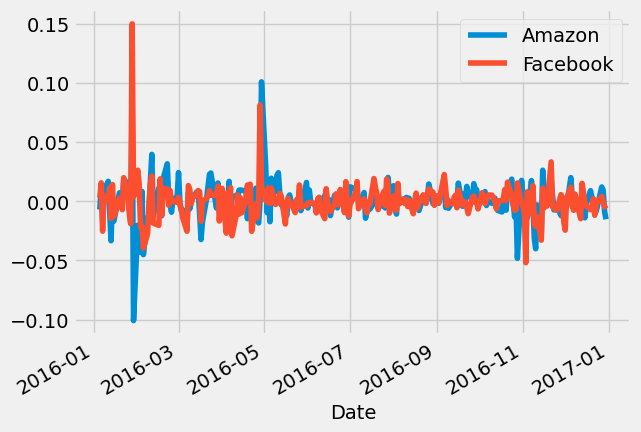

In [8]:
#let find the difference in the stock return and S&P 5000
excess_returns = stock_returns.sub(benchmark_returns, axis = 0)

#let see the first rows
print(excess_returns.head())

#let summarize it 
print(excess_returns.describe())

#let view it visually 
excess_returns.plot()

Amazon      0.000360
Facebook    0.000168
dtype: float64


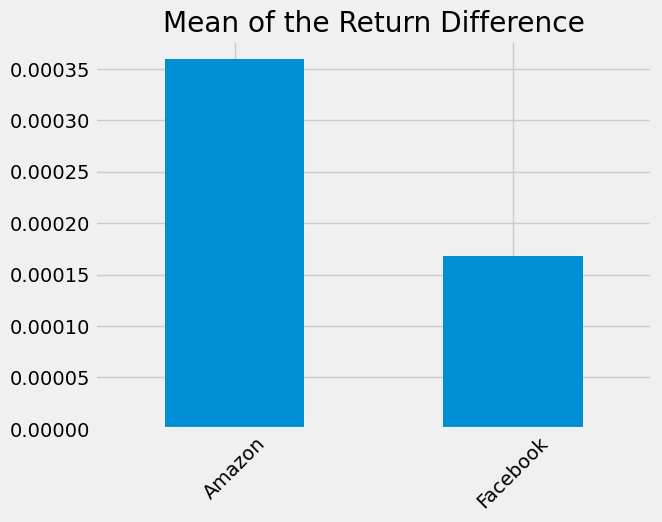

In [9]:
#the excess_returns mean 
avg_excess_returns = excess_returns.mean()

#let view the avg_exexcess_returns
print(avg_excess_returns)

#let visually view it 
avg_excess_returns.plot.bar(title = "Mean of the Return Difference")
plt.xticks(rotation=45)
plt.show()

Amazon      0.016126
Facebook    0.015439
dtype: float64


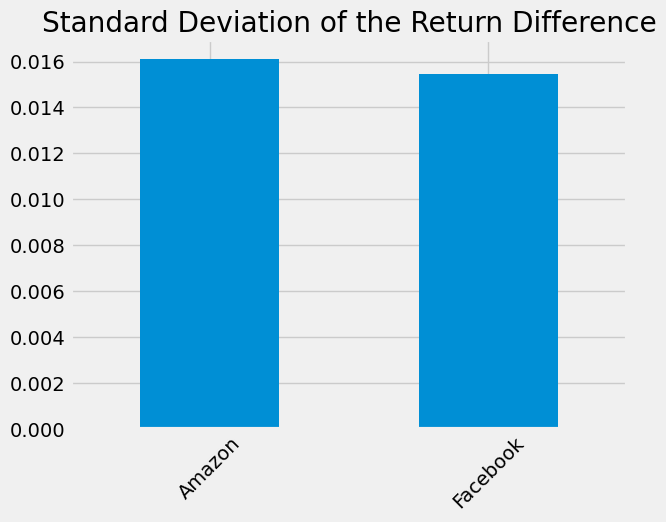

In [10]:
#the excess_returns std
std_excess_returns = excess_returns.std()

#let view the std_exexcess_returns
print(std_excess_returns)

#let visually view it 
std_excess_returns.plot.bar(title = "Standard Deviation of the Return Difference")
plt.xticks(rotation=45)
plt.show()

(array([0, 1]), [Text(0, 0, 'Amazon'), Text(1, 0, 'Facebook')])

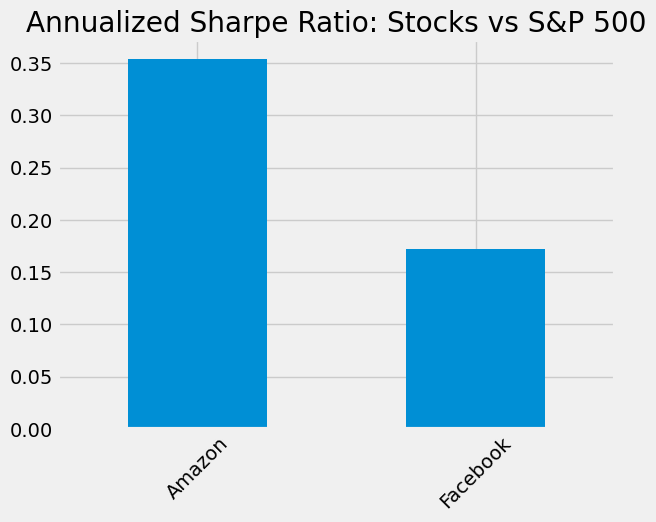

In [11]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_returns.div(std_excess_returns)

'''
The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. 
We have used daily data as input, 
so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252
'''

# annualize the sharpe ratio 
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.xticks(rotation=45)

# We will chose to investe in Amazon because it has the highest return per risk   